# Capstone 2: Biodiversity Project

# Introduction
You are a biodiversity analyst working for the National Parks Service.  You're going to help them analyze some data about species at various national parks.

Note: The data that you'll be working with for this project is *inspired* by real data, but is mostly fictional.

# Step 1
Import the modules that you'll be using in this assignment:
- `from matplotlib import pyplot as plt`
- `import pandas as pd`

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd

In [5]:
import numpy as np

# Step 2
You have been given two CSV files. `species_info.csv` with data about different species in our National Parks, including:
- The scientific name of each species
- The common names of each species
- The species conservation status

Load the dataset and inspect it:
- Load `species_info.csv` into a DataFrame called `species`

In [7]:
species = pd.read_csv('species_info.csv')

Inspect each DataFrame using `.head()`.

In [65]:
species

,category,scientific_name,common_names,conservation_status,is_protected,is_sheep
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Intervention,False,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Intervention,False,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,False
9,Mammal,Canis rufus,Red Wolf,Endangered,True,False


# Step 3
Let's start by learning a bit more about our data.  Answer each of the following questions.

In [66]:
species.groupby('category').count()

,scientific_name,common_names,conservation_status,is_protected,is_sheep
category,,,,,
Amphibian,80,80,80,80,80
Bird,521,521,521,521,521
Fish,127,127,127,127,127
Mammal,214,214,214,214,214
Nonvascular Plant,333,333,333,333,333
Reptile,79,79,79,79,79
Vascular Plant,4470,4470,4470,4470,4470


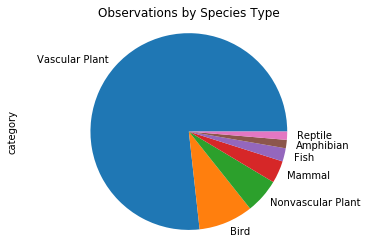

In [77]:
species.category.value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('Observations by Species Type')

How many different species are in the `species` DataFrame?

In [9]:
print(len(species))

5824


What are the different values of `category` in `species`?

In [10]:
print(list(species.columns.values))

['category', 'scientific_name', 'common_names', 'conservation_status']


What are the different values of `conservation_status`?

In [11]:
print(species.conservation_status.unique())

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


# Step 4
Let's start doing some analysis!

The column `conservation_status` has several possible values:
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currnetly neither in danger of extinction throughout all or a significant portion of its range

We'd like to count up how many species meet each of these criteria.  Use `groupby` to count how many `scientific_name` meet each of these criteria.

In [12]:
grouped_species = species.groupby('conservation_status')

In [13]:
print(grouped_species.head(10))

            category                scientific_name  \
0             Mammal  Clethrionomys gapperi gapperi   
1             Mammal                      Bos bison   
2             Mammal                     Bos taurus   
3             Mammal                     Ovis aries   
4             Mammal                 Cervus elaphus   
5             Mammal         Odocoileus virginianus   
6             Mammal                     Sus scrofa   
7             Mammal                  Canis latrans   
8             Mammal                    Canis lupus   
9             Mammal                    Canis rufus   
10            Mammal       Urocyon cinereoargenteus   
11            Mammal                   Vulpes fulva   
12            Mammal                  Vulpes vulpes   
29            Mammal               Eptesicus fuscus   
30            Mammal      Lasionycteris noctivagans   
33            Mammal          Myotis austroriparius   
34            Mammal              Myotis grisescens   
35        

In [14]:
grouped_species2 = species.groupby('conservation_status').scientific_name.count().reset_index()

In [11]:
print(grouped_species2.head(20))

  conservation_status  scientific_name
0          Endangered               16
1         In Recovery                4
2  Species of Concern              161
3          Threatened               10


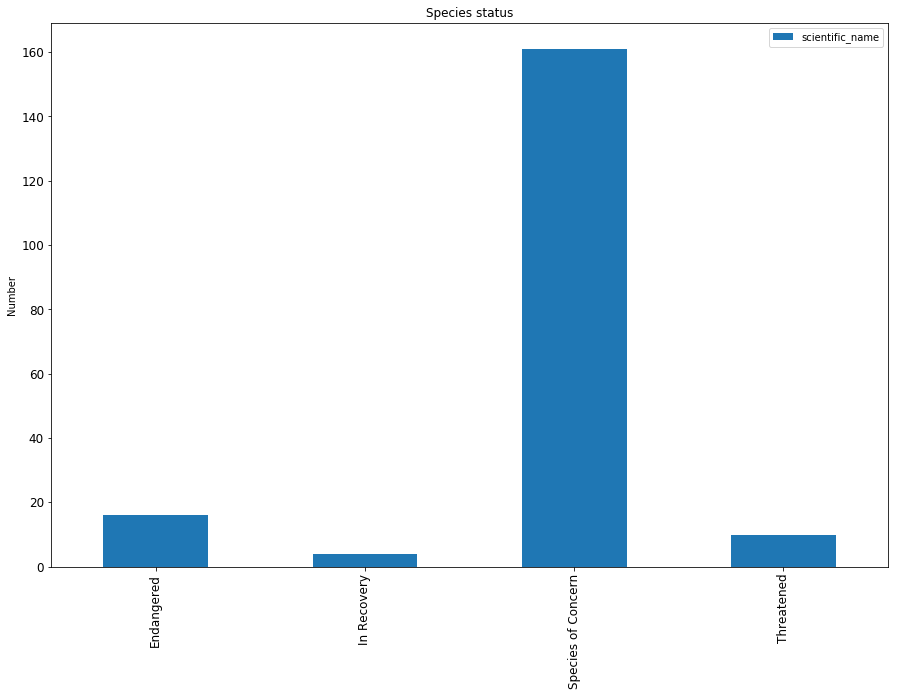

In [15]:
ax = grouped_species2.plot(kind='bar', title ="Species status", figsize=(15, 10), legend=True, fontsize=12)
ax.set_ylabel('Number')
ax.set_xticklabels(['Endangered', 'In Recovery', 'Species of Concern', 'Threatened'])
plt.show()


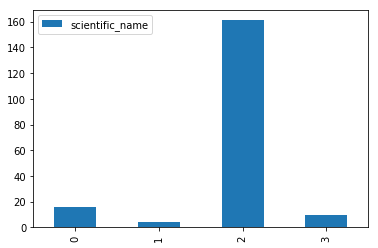

In [16]:
grouped_species2.plot.bar()

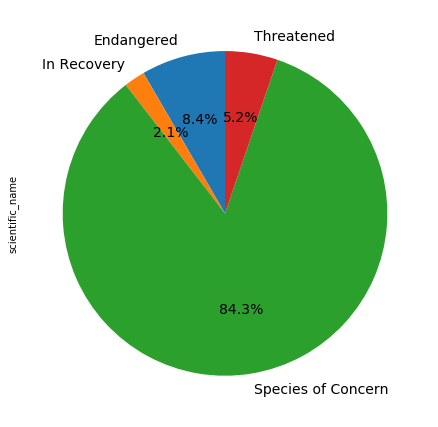

In [17]:
plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
grouped_species2.plot(kind='pie', y = 'scientific_name', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=grouped_species2['conservation_status'], legend = False, fontsize=14)

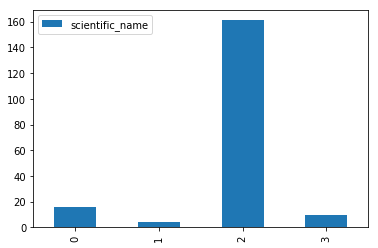

In [18]:
grouped_species2.plot.bar()

As we saw before, there are far more than 200 species in the `species` table.  Clearly, only a small number of them are categorized as needing some sort of protection.  The rest have `conservation_status` equal to `None`.  Because `groupby` does not include `None`, we will need to fill in the null values.  We can do this using `.fillna`.  We pass in however we want to fill in our `None` values as an argument.

Paste the following code and run it to see replace `None` with `No Intervention`:
```python
species.fillna('No Intervention', inplace=True)
```

In [19]:
print(species.fillna('No Intervention', inplace=True))

None


Great! Now run the same `groupby` as before to see how many species require `No Protection`.

In [20]:
grouped_species3 = species.groupby('conservation_status').scientific_name.count().reset_index()
print(grouped_species3.head(5))

  conservation_status  scientific_name
0          Endangered               16
1         In Recovery                4
2     No Intervention             5633
3  Species of Concern              161
4          Threatened               10


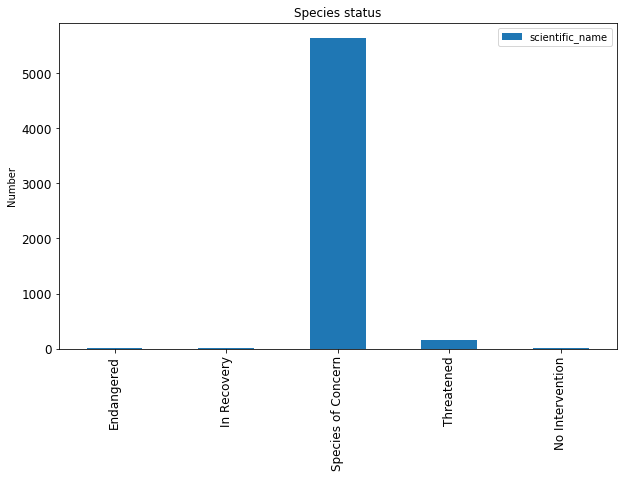

In [89]:
ax = grouped_species3.plot(kind='bar', title ="Species status", figsize=(10, 6), legend=True, fontsize=12)
ax.set_ylabel('Number')
ax.set_xticklabels(['Endangered', 'In Recovery', 'Species of Concern', 'Threatened', 'No Intervention'])
plt.show()


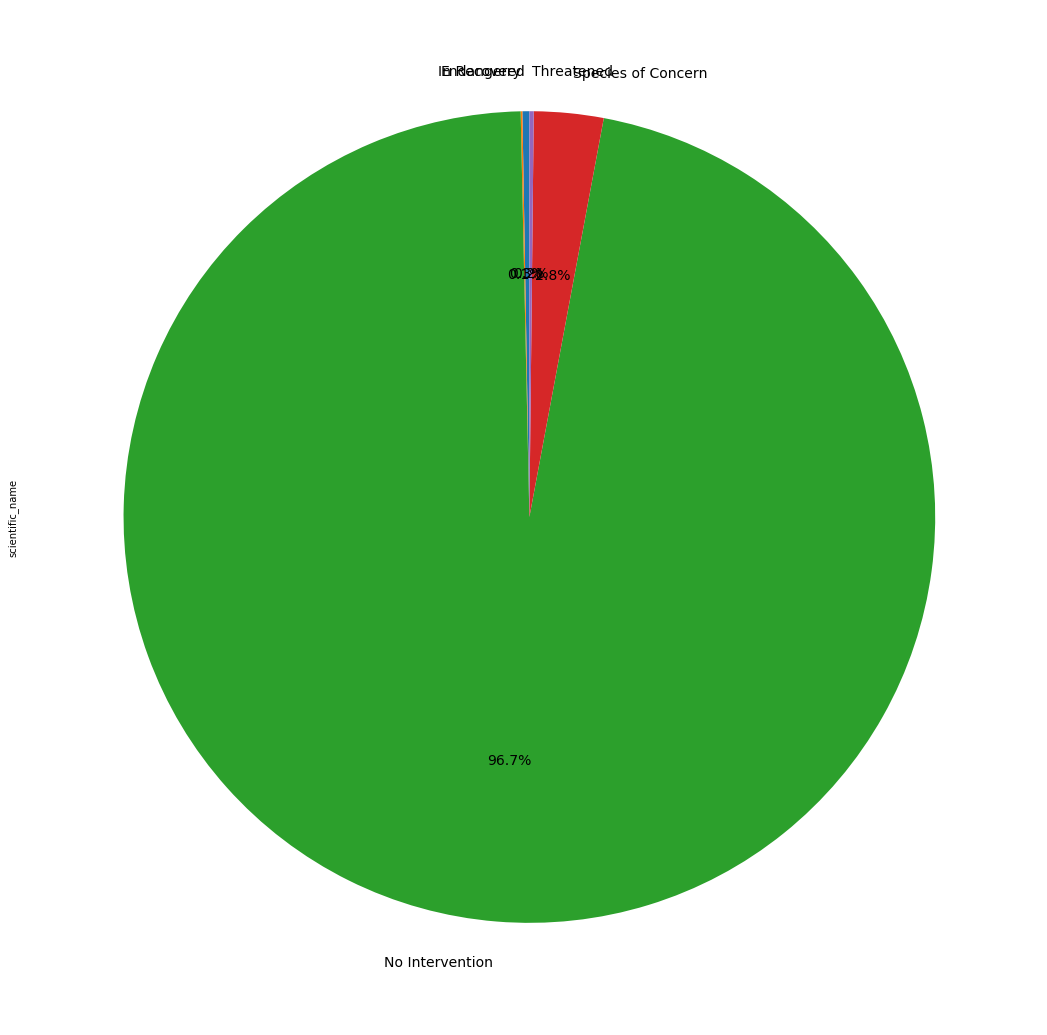

In [88]:
plt.figure(figsize=(40,20))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
grouped_species3.plot(kind='pie', y = 'scientific_name', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=grouped_species3['conservation_status'], legend = False, fontsize=14)

Let's use `plt.bar` to create a bar chart.  First, let's sort the columns by how many species are in each categories.  We can do this using `.sort_values`.  We use the the keyword `by` to indicate which column we want to sort by.

Paste the following code and run it to create a new DataFrame called `protection_counts`, which is sorted by `scientific_name`:
```python
protection_counts = species.groupby('conservation_status')\
    .scientific_name.count().reset_index()\
    .sort_values(by='scientific_name')
```

In [22]:
protection_counts = species.groupby('conservation_status')\
    .scientific_name.count().reset_index()\
    .sort_values(by='scientific_name')
print(protection_counts.head(5))

  conservation_status  scientific_name
1         In Recovery                4
4          Threatened               10
0          Endangered               16
3  Species of Concern              161
2     No Intervention             5633


Now let's create a bar chart!
1. Start by creating a wide figure with `figsize=(10, 4)`
1. Start by creating an axes object called `ax` using `plt.subplot`.
2. Create a bar chart whose heights are equal to `scientific_name` column of `protection_counts`.
3. Create an x-tick for each of the bars.
4. Label each x-tick with the label from `conservation_status` in `protection_counts`
5. Label the y-axis `Number of Species`
6. Title the graph `Conservation Status by Species`
7. Plot the grap using `plt.show()`

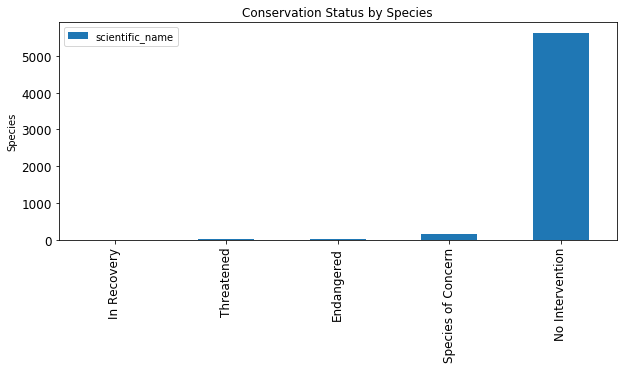

In [23]:
ax = protection_counts.plot(kind='bar', title ="Conservation Status by Species", figsize=(10, 4), legend=True, fontsize=12)
ax.set_ylabel('Species')
ax.set_xticklabels(protection_counts['conservation_status'])
plt.show()

# Step 4
Are certain types of species more likely to be endangered?

Let's create a new column in `species` called `is_protected`, which is `True` if `conservation_status` is not equal to `No Intervention`, and `False` otherwise.

In [24]:
species['is_protected'] = np.where(species['conservation_status']!='No Intervention', 'True', 'False')
print(species.head(10))

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   
5   Mammal         Odocoileus virginianus   
6   Mammal                     Sus scrofa   
7   Mammal                  Canis latrans   
8   Mammal                    Canis lupus   
9   Mammal                    Canis rufus   

                                        common_names conservation_status  \
0                           Gapper's Red-Backed Vole     No Intervention   
1                              American Bison, Bison     No Intervention   
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...     No Intervention   
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)     No Intervention   
4                                      Wapiti Or Elk     No Intervention   
5                                  White-Tailed 

Let's group by *both* `category` and `is_protected`.  Save your results to `category_counts`.

In [25]:
category_counts2 = species.groupby(['category','is_protected']).size().reset_index().groupby('is_protected')

is_protected
False    Axes(0.125,0.125;0.775x0.755)
True     Axes(0.125,0.125;0.775x0.755)
dtype: object

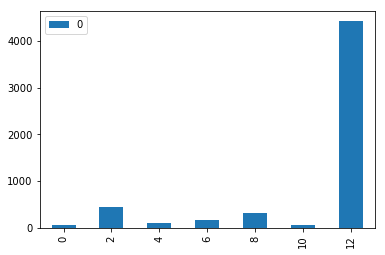

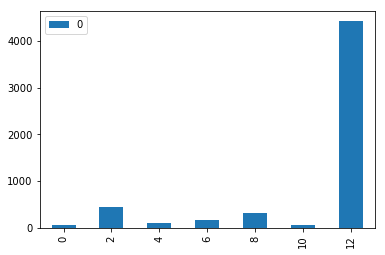

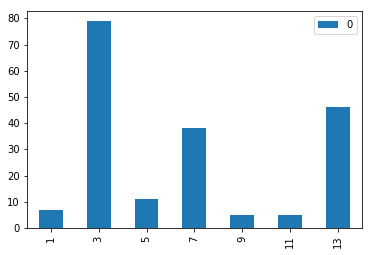

In [26]:
category_counts2.plot.bar()

In [27]:
category_counts2_max = species.groupby(['category','is_protected']).size().reset_index().groupby('is_protected')[[0]].max()

In [28]:
print(category_counts2_max)

                 0
is_protected      
False         4424
True            79


In [29]:
category_counts = species.groupby(['category', 'is_protected'])\
                         .scientific_name.count().reset_index()

Examine `category_count` using `head()`.

In [30]:
print(category_counts.head(10))

            category is_protected  scientific_name
0          Amphibian        False               73
1          Amphibian         True                7
2               Bird        False              442
3               Bird         True               79
4               Fish        False              116
5               Fish         True               11
6             Mammal        False              176
7             Mammal         True               38
8  Nonvascular Plant        False              328
9  Nonvascular Plant         True                5


It's going to be easier to view this data if we pivot it.  Using `pivot`, rearange `category_counts` so that:
- `columns` is `conservation_status`
- `index` is `category`
- `values` is `scientific_name`

Save your pivoted data to `category_pivot`. Remember to `reset_index()` at the end.

In [31]:
category_pivot = category_counts.pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                                .reset_index()

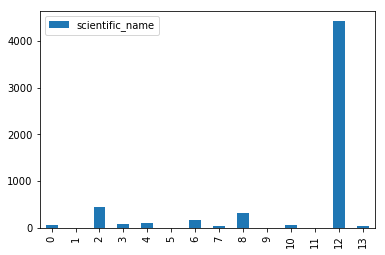

In [29]:
category_counts.plot.bar(stacked=True)

In [32]:
category_pivot

is_protected,category,False,True
0,Amphibian,73,7
1,Bird,442,79
2,Fish,116,11
3,Mammal,176,38
4,Nonvascular Plant,328,5
5,Reptile,74,5
6,Vascular Plant,4424,46


In [33]:
from scipy.stats import chi2_contingency


X = [[73, 7],
     [442, 79],
     [116, 11],
    [176, 38],
     [328, 5],
     [74, 5],
     [4424, 46]]
chi2, pval, dof, expected = chi2_contingency(X)
print(pval)

3.0959119099e-98


Examine `category_pivot`.

Use the `.columns` property to  rename the categories `True` and `False` to something more description:
- Leave `category` as `category`
- Rename `False` to `not_protected`
- Rename `True` to `protected`

In [34]:
category_pivot.columns = [
    'category',
  'not_protected',
  'protected'
]


In [33]:
category_pivot

,category,not_protected,protected
0,Amphibian,73,7
1,Bird,442,79
2,Fish,116,11
3,Mammal,176,38
4,Nonvascular Plant,328,5
5,Reptile,74,5
6,Vascular Plant,4424,46


Let's create a new column of `category_pivot` called `percent_protected`, which is equal to `protected` (the number of species that are protected) divided by `protected` plus `not_protected` (the total number of species).

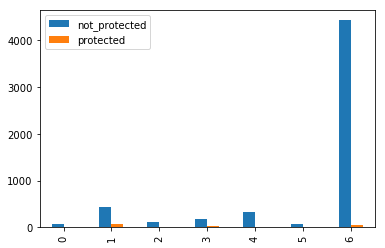

In [35]:
category_pivot.plot.bar()

In [32]:
category_pivot['percent_protected'] = ((category_pivot.protected / \
                                      (category_pivot.protected + category_pivot.not_protected)))/100

Examine `category_pivot`.

In [36]:
category_pivot

,category,not_protected,protected
0,Amphibian,73,7
1,Bird,442,79
2,Fish,116,11
3,Mammal,176,38
4,Nonvascular Plant,328,5
5,Reptile,74,5
6,Vascular Plant,4424,46


In [34]:
import seaborn as sns
%matplotlib inline

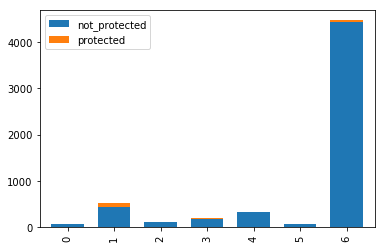

In [102]:
category_pivot.plot.bar(width=.7, stacked=True)
bars = ('Birds', 'Vascular Plants', 'Mammal', 'Fish', 'Amphibian', 'Nonvascular Plant', 'Reptile')
ax.set_title("Proportion Protected In Category")
ax.set_xlabel(bars)




In [105]:
sns.factorplot(x="category", y="species", hue="protected", data=category_pivot, kind="bar");

NameError: name 'sns' is not defined

It looks like species in category `Mammal` are more likely to be endangered than species in `Bird`.  We're going to do a significance test to see if this statement is true.  Before you do the significance test, consider the following questions:
- Is the data numerical or categorical?
- How many pieces of data are you comparing?

Based on those answers, you should choose to do a *chi squared test*.  In order to run a chi squared test, we'll need to create a contingency table.  Our contingency table should look like this:

||protected|total|
|-|-|-|
|Mammal|?|?|
|Bird|?|?|

Create a table called `contingency` and fill it in with the correct numbers

In [38]:
contingency = [[73, 7],
     [442, 79],
     [116, 11],
    [176, 38],
     [328, 5],
     [74, 5],
     [4424, 46]]

In order to perform our chi square test, we'll need to import the correct function from scipy.  Past the following code and run it:

Now run `chi2_contingency` with `contingency`.

In [39]:

chi2, pval, dof, expected = chi2_contingency(contingency)
print(pval)

3.0959119099e-98


It looks like this difference isn't significant!

Let's test another.  Is the difference between `Reptile` and `Mammal` significant?

In [40]:
GodzillaVersusKong = [[176, 38],[74,5]]

In [41]:
chi2, pval, dof, expected = chi2_contingency(GodzillaVersusKong)
print(pval)

0.0233846521487


In [42]:
VVN = [ [328, 5],
     [4424, 46]]
chi2, pval, dof, expected = chi2_contingency(VVN)
print(pval)

0.593134140879


In [43]:
AVB= [[73, 7],
     [442, 79]]
chi2, pval, dof, expected = chi2_contingency(AVB)
print(pval)

0.175827797604


In [44]:
BVR = [[449, 79],
     [74, 5]]
chi2, pval, dof, expected = chi2_contingency(BVR)
print(pval)

0.0577179916556


In [45]:
AVM= [[73, 7],
     [176, 38]]
chi2, pval, dof, expected = chi2_contingency(AVM)
print(pval)

0.0841692884746


In [46]:
VVM= [[328, 5],
     [176, 38]]
chi2, pval, dof, expected = chi2_contingency(VVM)
print(pval)

1.68189307447e-11


Yes! It looks like there is a significant difference between `Reptile` and `Mammal`!

# Step 5

Conservationists have been recording sightings of different species at several national parks for the past 7 days.  They've saved sent you their observations in a file called `observations.csv`.  Load `observations.csv` into a variable called `observations`, then use `head` to view the data.

In [47]:
observations = pd.read_csv('observations.csv')

In [48]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [49]:
len(observations.index)

23296

In [50]:
observations.groupby(['park_name']).observations.sum()

park_name
Bryce National Park                     576025
Great Smoky Mountains National Park     431820
Yellowstone National Park              1443562
Yosemite National Park                  863332
Name: observations, dtype: int64

In [51]:
sortedpark = observations.groupby(['park_name']).observations.sum().reset_index()

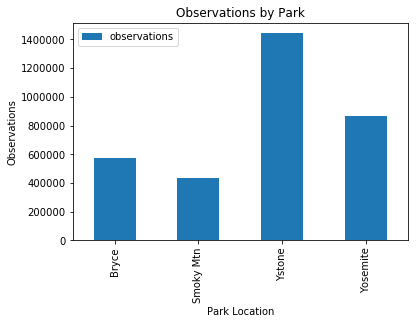

In [52]:
#sortedpark.plot(kind="bar")
x_labels = ['Bryce', 'Smoky Mtn', 'Ystone', 'Yosemite']

# now to plot the figure...
plt.figure(figsize=(12, 8))
fig = sortedpark.plot(kind='bar')
fig.set_title("Observations by Park")
fig.set_xlabel("Park Location")
fig.set_ylabel("Observations")
fig.set_xticklabels(x_labels)


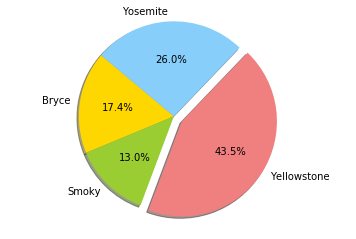

In [53]:
labels = ['Bryce', 'Smoky', 'Yellowstone', 'Yosemite']
sizes = [576025, 431820, 1443562, 863332]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0, 0, 0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

Some scientists are studying the number of sheep sightings at different national parks.  There are several different scientific names for different types of sheep.  We'd like to know which rows of `species` are referring to sheep.  Notice that the following code will tell us whether or not a word occurs in a string:

In [54]:
# Does "Sheep" occur in this string?
str1 = 'This string contains Sheep'
'Sheep' in str1

True

In [55]:
# Does "Sheep" occur in this string?
str2 = 'This string contains Cows'
'Sheep' in str2

False

Use `apply` and a `lambda` function to create a new column in `species` called `is_sheep` which is `True` if the `common_names` contains `'Sheep'`, and `False` otherwise.

In [56]:
#species['is_sheep'] = species.apply(lambda x: 'Sheep' in ['common_names'], False)
#species['is_sheep'] = np.where('Sheep' in ['common_names'], True, False)
species['is_sheep'] = species.common_names.apply(lambda x: 'Sheep' in x)


In [57]:
species['is_sheep'] = species.common_names.apply(lambda x: 'Sheep' in x)
species.head()

,category,scientific_name,common_names,conservation_status,is_protected,is_sheep
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False


Select the rows of `species` where `is_sheep` is `True` and examine the results.

In [58]:
species.head(100)

,category,scientific_name,common_names,conservation_status,is_protected,is_sheep
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Intervention,False,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Intervention,False,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,False
9,Mammal,Canis rufus,Red Wolf,Endangered,True,False


In [67]:
sheep_species = species[(species.is_sheep) & (species.category == 'Mammal')]

Many of the results are actually plants.  Select the rows of `species` where `is_sheep` is `True` and `category` is `Mammal`.  Save the results to the variable `sheep_species`.

In [68]:
sheep_species

,category,scientific_name,common_names,conservation_status,is_protected,is_sheep
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True
3014,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
4446,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,True,True


In [69]:
species['is_sheep'] = species.common_names.apply(lambda x: 'Sheep' in x)
species.head()

,category,scientific_name,common_names,conservation_status,is_protected,is_sheep
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False


In [79]:
sheep_observations = observations.merge(sheep_species)
sheep_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_sheep
0,Ovis canadensis,Yellowstone National Park,219,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
1,Ovis canadensis,Bryce National Park,109,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
2,Ovis canadensis,Yosemite National Park,117,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
3,Ovis canadensis,Great Smoky Mountains National Park,48,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
4,Ovis canadensis sierrae,Yellowstone National Park,67,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,True
5,Ovis canadensis sierrae,Yosemite National Park,39,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,True
6,Ovis canadensis sierrae,Bryce National Park,22,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,True
7,Ovis canadensis sierrae,Great Smoky Mountains National Park,25,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,True
8,Ovis aries,Yosemite National Park,126,Mammal,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True
9,Ovis aries,Great Smoky Mountains National Park,76,Mammal,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True


Now merge `sheep_species` with `observations` to get a DataFrame with observations of sheep.  Save this DataFrame as `sheep_observations`.

In [80]:
sheep_observations.head(5)

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_sheep
0,Ovis canadensis,Yellowstone National Park,219,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
1,Ovis canadensis,Bryce National Park,109,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
2,Ovis canadensis,Yosemite National Park,117,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
3,Ovis canadensis,Great Smoky Mountains National Park,48,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
4,Ovis canadensis sierrae,Yellowstone National Park,67,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,True


In [82]:
obs_by_park = pd.merge(sheep_species,
                 observations[['scientific_name', 'park_name', 'observations']],
                 on='scientific_name').groupby('park_name')

In [83]:
sheep_observations = observations.merge(sheep_species)
sheep_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_sheep
0,Ovis canadensis,Yellowstone National Park,219,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
1,Ovis canadensis,Bryce National Park,109,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
2,Ovis canadensis,Yosemite National Park,117,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
3,Ovis canadensis,Great Smoky Mountains National Park,48,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
4,Ovis canadensis sierrae,Yellowstone National Park,67,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,True
5,Ovis canadensis sierrae,Yosemite National Park,39,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,True
6,Ovis canadensis sierrae,Bryce National Park,22,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,True
7,Ovis canadensis sierrae,Great Smoky Mountains National Park,25,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,True
8,Ovis aries,Yosemite National Park,126,Mammal,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True
9,Ovis aries,Great Smoky Mountains National Park,76,Mammal,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True


How many total sheep observations (across all three species) were made at each national park?  Use `groupby` to get the `sum` of `observations` for each `park_name`.  Save your answer to `obs_by_park`.

This is the total number of sheep observed in each park over the past 7 days.

In [84]:
obs_by_park.describe()

observations                               \
                                           count        mean        std   min   
park_name                                                                       
Bryce National Park                          3.0   83.333333  53.351039  22.0   
Great Smoky Mountains National Park          3.0   49.666667  25.540817  25.0   
Yellowstone National Park                    3.0  169.000000  88.340251  67.0   
Yosemite National Park                       3.0   94.000000  47.843495  39.0   

                                                                 
                                       25%    50%    75%    max  
park_name                                                        
Bryce National Park                   65.5  109.0  114.0  119.0  
Great Smoky Mountains National Park   36.5   48.0   62.0   76.0  
Yellowstone National Park            143.0  219.0  220.0  221.0  
Yosemite National Park                78.0  117.0  121.5  126.0

In [85]:
park_sums = obs_by_park.observations.sum().groupby('park_name')

In [87]:
obs_by_park = sheep_observations.groupby('park_name').observations.sum().reset_index()
obs_by_park

,park_name,observations
0,Bryce National Park,250
1,Great Smoky Mountains National Park,149
2,Yellowstone National Park,507
3,Yosemite National Park,282


Create a bar chart showing the different number of observations per week at each park.

1. Start by creating a wide figure with `figsize=(16, 4)`
1. Start by creating an axes object called `ax` using `plt.subplot`.
2. Create a bar chart whose heights are equal to `observations` column of `obs_by_park`.
3. Create an x-tick for each of the bars.
4. Label each x-tick with the label from `park_name` in `obs_by_park`
5. Label the y-axis `Number of Observations`
6. Title the graph `Observations of Sheep per Week`
7. Plot the grap using `plt.show()`

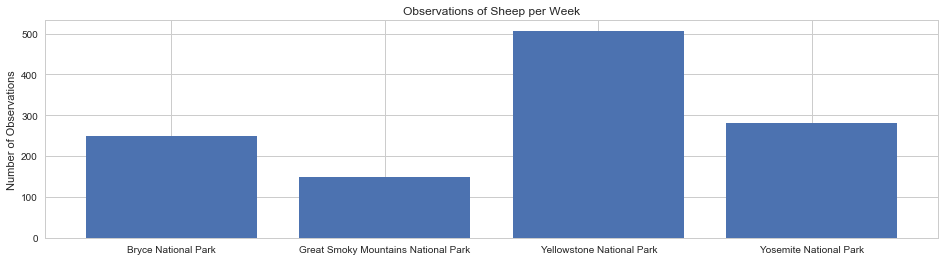

In [88]:
plt.figure(figsize=(16, 4))
ax = plt.subplot()
plt.bar(range(len(obs_by_park)),
        obs_by_park.observations.values)
ax.set_xticks(range(len(obs_by_park)))
ax.set_xticklabels(obs_by_park.park_name.values)
plt.ylabel('Number of Observations')
plt.title('Observations of Sheep per Week')
plt.show()

In [89]:
park_sums.describe()

,count,mean,std,min,25%,50%,75%,max
park_name,,,,,,,,
Bryce National Park,1.0,250.0,NaN,250.0,250.0,250.0,250.0,250.0
Great Smoky Mountains National Park,1.0,149.0,NaN,149.0,149.0,149.0,149.0,149.0
Yellowstone National Park,1.0,507.0,NaN,507.0,507.0,507.0,507.0,507.0
Yosemite National Park,1.0,282.0,NaN,282.0,282.0,282.0,282.0,282.0


In [92]:
print(250 + 149 + 507 + 282)
print(35000/1188)

1188
29.46127946127946


Our scientists know that 15% of sheep at Bryce National Park have foot and mouth disease.  Park rangers at Yellowstone National Park have been running a program to reduce the rate of foot and mouth disease at that park.  The scientists want to test whether or not this program is working.  They want to be able to detect reductions of at least 5 percentage point.  For instance, if 10% of sheep in Yellowstone have foot and mouth disease, they'd like to be able to know this, with confidence.

Use the sample size calculator at <a href="https://www.optimizely.com/sample-size-calculator/">Optimizely</a> to calculate the number of sheep that they would need to observe from each park.  Use the default level of significance (90%).

Remember that "Minimum Detectable Effect" is a percent of the baseline.

In [95]:
minimum_detectable_effect = 100 * 0.05 / 0.15
minimum_detectable_effect

33.333333333333336

In [59]:
sample_size_per_variant = 510

In [60]:
bryce = 510 / 250
yellowstone = 510 / 507
yosemite = 510/282
greatsmoky = 510/149

How many weeks would you need to observe sheep at Bryce National Park in order to observe enough sheep?  How many weeks would you need to observe at Yellowstone National Park to observe enough sheep?

In [96]:
baseline = 15

In [61]:
bryce

2.04

In [62]:
yellowstone

1.0059171597633136

In [63]:
yosemite

1.8085106382978724

In [64]:
greatsmoky

3.422818791946309